In [1]:
import sys
import muon as mu 
import numpy as np
import pandas as pd

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')

from Plotting.src import plot_umap_per_gene, plot_top_program_per_gene, perturbed_gene_dotplot,\
                         plot_log2FC, plot_volcano, programs_dotplots, analyze_correlations, \
                         graph_pdf_gene_QC, convert_with_mygene, convert_adata_with_mygene, read_npz, merge_pdfs_in_folder

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Find perturbed gene

In [2]:
save_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval"
program_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240701_cNMF/output/all/consensus_NMF/consensus_NMF.usages.k_100.dt_0_2.consensus.txt"
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu"
top_program = 5
gene_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/consensus_NMF.gene_spectra_score.k_100.dt_0_2.txt"
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample"


In [3]:
mdata = mu.read_h5mu(mdata_path)

# replace name
replacement_dict = {
    'sample_D3': 'D3',
    'sample_D2': 'D2', 
    'sample_D1': 'D1'
}  
mdata['rna'].obs['sample'] = mdata['rna'].obs['sample'].replace(replacement_dict)

perturbed_gene = np.unique(mdata['cNMF'].uns["guide_targets"])

/tmp/ipykernel_12954/3871938191.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  mdata['rna'].obs['sample'] = mdata['rna'].obs['sample'].replace(replacement_dict)


In [4]:
# found detected perturbed gene
gene_list = convert_with_mygene(pd.DataFrame(index=mdata.var_names.tolist())) # convert gene id to geene name
perturbed_gene_found = list(set(gene_list.index) & set(perturbed_gene))
len(perturbed_gene_found)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
211 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


56

In [5]:
# select gene of interest
Target_Gene = perturbed_gene_found[3]
Target_Gene

'TGFBR2'

# UMAP

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


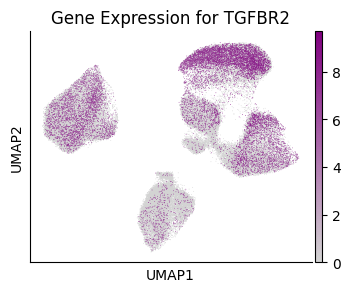

In [6]:
plot_umap_per_gene(mdata, Target_Gene, figsize = (4,3), show = True)

# Top x assigned programs

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


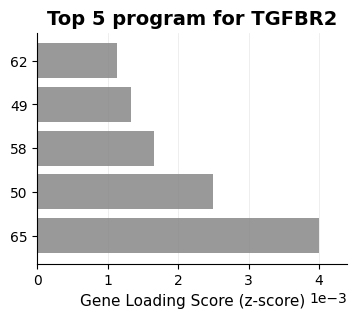

In [7]:
plot_top_program_per_gene(gene_loading_path, Target_Gene, top_program, figsize = (4,3),show = True)

# Dot plots

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


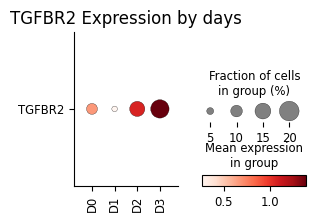

In [8]:
perturbed_gene_dotplot(mdata, Target_Gene, figsize = (3,2), show = True)

# Perturbation analysis of gene

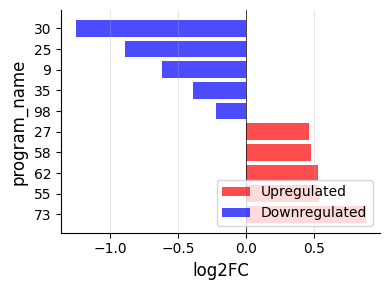

In [9]:
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"

df = plot_log2FC(perturb_path, Target = Target_Gene, tagert_col_name = "target_name", plot_col_name = "program_name", p_value = 0.5, figsize = (4,3), show = True)

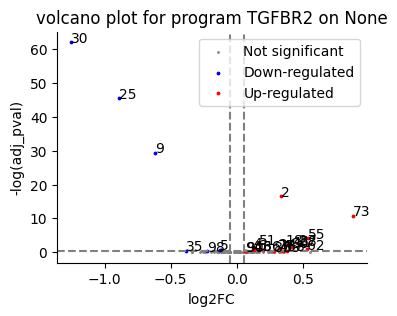

,target_name,program_name,ref_mean,test_mean,log2FC,stat,pval,adj_pval
0,TGFBR2,2,0.086493,0.108852,0.331703,1914458.5,1.681143e-20,3.131130e-17
1,TGFBR2,4,0.078964,0.086020,0.123487,1704400.5,3.895994e-04,3.096016e-02
2,TGFBR2,5,0.051086,0.046685,-0.129978,1473365.0,5.727200e-03,1.943856e-01
3,TGFBR2,6,0.031229,0.034904,0.160504,1675019.5,5.928836e-03,1.991875e-01
4,TGFBR2,7,0.002467,0.003116,0.337025,1646872.0,1.369292e-02,3.200384e-01
5,TGFBR2,9,0.065006,0.042419,-0.615864,1132630.5,1.476640e-33,4.400386e-30
6,TGFBR2,11,0.002128,0.002856,0.424240,1676992.5,2.505523e-04,2.165801e-02
7,TGFBR2,13,0.029032,0.031783,0.130630,1665464.5,1.272123e-02,3.092111e-01
8,TGFBR2,18,0.005348,0.006876,0.362415,1708559.5,4.339304e-05,5.299641e-03
9,TGFBR2,24,0.004076,0.005079,0.317107,1671164.5,1.939014e-03,1.013730e-01


In [10]:
plot_volcano(perturb_path, Target = Target_Gene, down_thred_log = -0.05, up_thred_log = 0.05, p_value_thred = 0.5, figsize = (4,3),show = True)

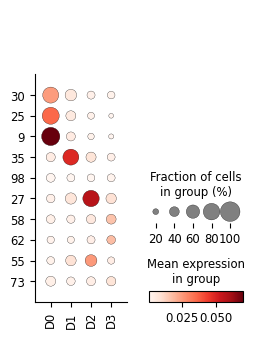

In [11]:
programs_dotplots(mdata, program_loading_path, program_list = df["program_name"].tolist(), save_path = None, save_name = None, figsize = (3,2),show = True)

# Correlation of program

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


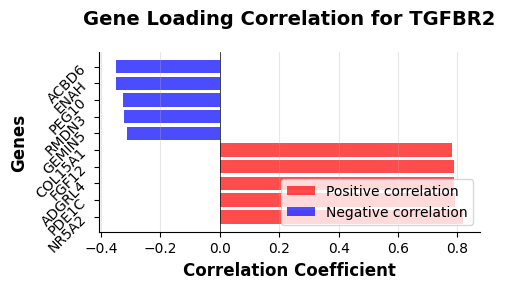

NR5A2      0.817791
PDE1C      0.793076
ADGRL4     0.790222
FGF12      0.787900
COL15A1    0.781702
GEMIN5    -0.312867
RMDN3     -0.322083
PEG10     -0.324876
ENAH      -0.349321
ACBD6     -0.349412
Name: TGFBR2, dtype: float64

In [12]:
analyze_correlations(gene_loading_path,Target_Gene, f"Gene Loading Correlation for {Target_Gene}", figsize = (5,3),show = True)

# Make PDf

In [13]:
save_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval"
program_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240701_cNMF/output/all/consensus_NMF/consensus_NMF.usages.k_100.dt_0_2.consensus.txt"
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu"
top_program = 5
gene_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/consensus_NMF.gene_spectra_score.k_100.dt_0_2.txt"
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample"


In [14]:
graph_pdf_gene_QC(mdata, gene_loading_path, program_loading_path, perturb_path, Target_Gene = Target_Gene, top_program= 5, save_path=save_path, save_name=f"{Target_Gene} QC")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 in

In [ ]:
# Graph all pdf 
for gene in perturbed_gene_found:

    save_name = f"{gene} QC"

    mdata = mdata = mu.read_h5mu(mdata_path)

    graph_pdf_gene_QC(mdata, gene_loading_path, program_loading_path, perturb_path, Target_Gene = gene, top_program= 5, p_value = 0.05, save_path=save_path, save_name=save_name)
    

In [10]:
pdf_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval/Perturbed_Gene_QC"

merge_pdfs_in_folder(pdf_path)

Found 49 PDF files:
